In [1]:
import pandas as pd
import numpy as np

In [2]:
books = pd.read_csv("./books_data/books.csv",sep = ";" , on_bad_lines = 'skip', encoding= "latin-1")

C:\Users\Jyoti Prakash Dhala\AppData\Local\Temp\ipykernel_17892\3329343244.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("./books_data/books.csv",sep = ";" , on_bad_lines = 'skip', encoding= "latin-1")


In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
print(books.iloc[1]['Image-URL-L'])
print(books.iloc[1]['Image-URL-M'])
print(books.iloc[1]['Image-URL-S'])

http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg
http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg


In [5]:
books = books.drop(columns=['Image-URL-L','Image-URL-S'])

In [6]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [7]:
books.shape

(271360, 6)

In [8]:
users = pd.read_csv("./books_data/users.csv", sep=';',on_bad_lines= "skip",encoding= 'latin-1' )

In [9]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [10]:
users.shape

(278858, 3)

In [11]:
ratings = pd.read_csv("./books_data/ratings.csv", sep=';',on_bad_lines= "skip",encoding= 'latin-1' )

In [12]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [13]:
print(ratings.shape)

(1149780, 3)


In [14]:
user_data = ratings.groupby('User-ID').agg({'Book-Rating' : ['mean' , 'count']})

In [15]:
user_data.columns=['rating_mean','rating_count']

In [16]:
user_data = user_data.reset_index()

In [17]:
user_data.head()

,User-ID,rating_mean,rating_count
0,2,0.000000,1
1,7,0.000000,1
2,8,2.166667,18
3,9,2.000000,3
4,10,3.000000,2


In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [19]:
x = user_data[['rating_mean', 'rating_count']].values.astype('float32')

In [20]:
ss = StandardScaler()
x_scaled = ss.fit_transform(x)

In [21]:
inertia = []
K_range = range(1, 20)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

In [22]:
from kneed import KneeLocator
knee = KneeLocator(K_range, inertia, curve='convex', direction='decreasing')
print("Optimal number of clusters:", knee.knee)


Optimal number of clusters: 5


In [23]:
kmeans = KMeans(n_clusters=knee.knee, random_state=42)
user_data['cluster'] = kmeans.fit_predict(x_scaled)

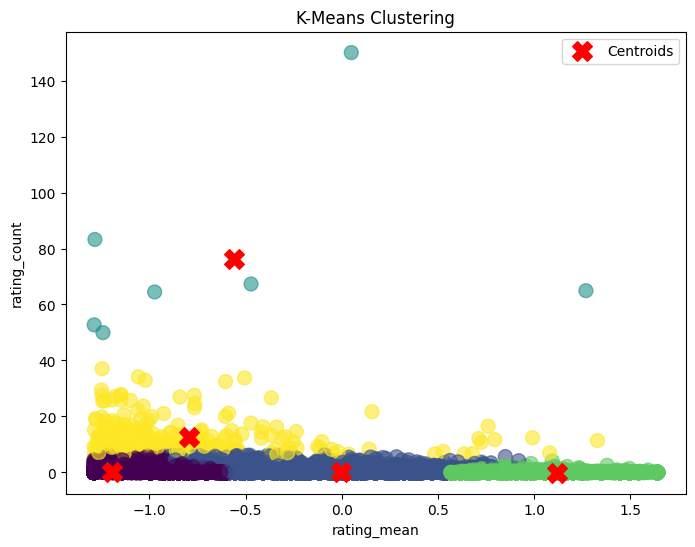

In [24]:
import matplotlib.pyplot as plt
labels = kmeans.labels_
centers = kmeans.cluster_centers_

plt.figure(figsize=(8,6))
plt.scatter(x_scaled[:,0], x_scaled[:,1], c=labels, cmap='viridis', s=100, alpha=0.6)

plt.scatter(centers[:,0], centers[:,1], c='red', s=200, marker='X', label='Centroids')

plt.xlabel('rating_mean')
plt.ylabel('rating_count')
plt.title('K-Means Clustering')
plt.legend()


In [25]:
distances = np.linalg.norm(x_scaled - kmeans.cluster_centers_[user_data['cluster']], axis=1)
threshold = distances.mean() + 3*distances.std()
print(threshold)

1.8359984457492828


In [26]:
user_data['label'] = np.where(distances > threshold, -1, 0)

In [27]:
user_data.head()

,User-ID,rating_mean,rating_count,cluster,label
0,2,0.000000,1,0,0
1,7,0.000000,1,0,0
2,8,2.166667,18,0,0
3,9,2.000000,3,0,0
4,10,3.000000,2,1,0


In [28]:
valid_ids = user_data[user_data['label'] != -1]['User-ID']

In [29]:
cleaned_ratings = ratings[ratings['User-ID'].isin(valid_ids)]

In [30]:
cleaned_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [31]:
print(cleaned_ratings.shape)
print(ratings.shape)

(647884, 3)
(1149780, 3)


In [32]:
cleaned_ratings['rating_count'] = cleaned_ratings.groupby('User-ID')['Book-Rating'].transform('count')

C:\Users\Jyoti Prakash Dhala\AppData\Local\Temp\ipykernel_17892\2026450739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_ratings['rating_count'] = cleaned_ratings.groupby('User-ID')['Book-Rating'].transform('count')


In [33]:
cleaned_ratings = cleaned_ratings[cleaned_ratings['rating_count'] > 10].reset_index(drop=True)

In [34]:
cleaned_ratings=cleaned_ratings.drop('rating_count', axis=1)

In [35]:
cleaned_ratings.head()

,User-ID,ISBN,Book-Rating
0,276762,034544003X,0
1,276762,0380000059,0
2,276762,0380711524,5
3,276762,0451167317,0
4,276762,0451454952,0


In [36]:
cleaned_ratings.shape

(453377, 3)

In [37]:
cleaned_ratings.groupby('User-ID').size().describe()

count    11047.000000
mean        41.040735
std         78.886549
min         11.000000
25%         15.000000
50%         23.000000
75%         44.000000
max       1310.000000
dtype: float64

<Axes: >

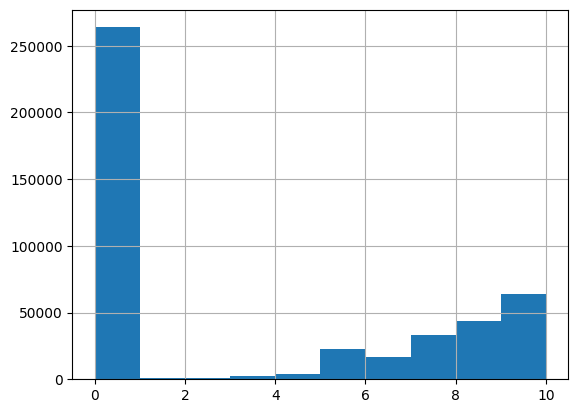

In [38]:
cleaned_ratings['Book-Rating'].hist(bins=10)

In [39]:
cleaned_ratings = cleaned_ratings[cleaned_ratings['Book-Rating'] >3]

<Axes: >

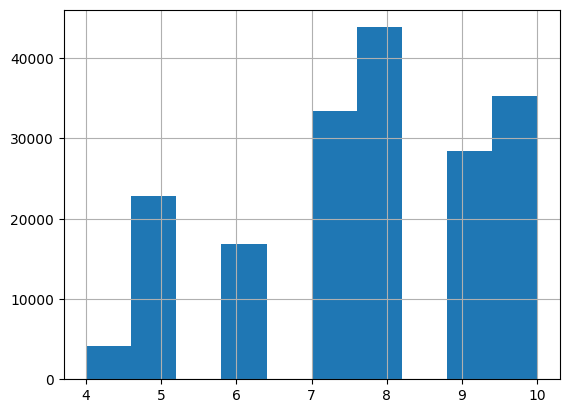

In [40]:
import matplotlib.pyplot as plt
cleaned_ratings['Book-Rating'].hist(bins=10)

In [41]:
cleaned_ratings.shape

(184824, 3)

In [42]:
cleaned_ratings.groupby('User-ID').size().describe()

count    10684.000000
mean        17.299139
std         27.012643
min          1.000000
25%          7.000000
50%         11.000000
75%         20.000000
max        922.000000
dtype: float64

In [43]:
cleaned_ratings['rating_count'] = cleaned_ratings.groupby('User-ID')['Book-Rating'].transform('count')

In [44]:
cleaned_ratings = cleaned_ratings[cleaned_ratings['rating_count'] > 10].reset_index(drop=True)

In [45]:
cleaned_ratings

,User-ID,ISBN,Book-Rating,rating_count
0,276822,0060096195,10,15
1,276822,0141310340,9,15
2,276822,0142302198,10,15
3,276822,0156006065,9,15
4,276822,0375821813,9,15
...,...,...,...,...
152567,276688,0836218655,10,27
152568,276688,0836236688,10,27
152569,276688,0892966548,10,27
152570,276688,1551669315,6,27


In [46]:
cleaned_ratings.head()

,User-ID,ISBN,Book-Rating,rating_count
0,276822,0060096195,10,15
1,276822,0141310340,9,15
2,276822,0142302198,10,15
3,276822,0156006065,9,15
4,276822,0375821813,9,15


In [47]:
cleaned_ratings=cleaned_ratings.drop('rating_count', axis=1)

In [48]:
retings_with_books = cleaned_ratings.merge(books,on='ISBN')

In [49]:
retings_with_books.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
0,276822,0060096195,10,The Boy Next Door,Meggin Cabot,2002,Avon Trade,http://images.amazon.com/images/P/0060096195.0...
1,276822,0141310340,9,Skin and Other Stories (Now in Speak!),Roald Dahl,2002,Puffin Books,http://images.amazon.com/images/P/0141310340.0...
2,276822,0142302198,10,Growing Wings,Laurel Winter,2002,Puffin Books,http://images.amazon.com/images/P/0142302198.0...
3,276822,0156006065,9,The Riddle of Scheherazade: And Other Amazing ...,Raymond Smullyan,1998,Harvest Books,http://images.amazon.com/images/P/0156006065.0...
4,276822,0375821813,9,Hoot (Newbery Honor Book),CARL HIAASEN,2002,Knopf Books for Young Readers,http://images.amazon.com/images/P/0375821813.0...


In [50]:
retings_with_books.shape

(136557, 8)

In [51]:
retings_with_books['rating_coun'] = retings_with_books.groupby('Book-Title')['Book-Rating'].transform('count')

In [52]:
retings_with_books.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,rating_coun
0,276822,0060096195,10,The Boy Next Door,Meggin Cabot,2002,Avon Trade,http://images.amazon.com/images/P/0060096195.0...,23
1,276822,0141310340,9,Skin and Other Stories (Now in Speak!),Roald Dahl,2002,Puffin Books,http://images.amazon.com/images/P/0141310340.0...,3
2,276822,0142302198,10,Growing Wings,Laurel Winter,2002,Puffin Books,http://images.amazon.com/images/P/0142302198.0...,2
3,276822,0156006065,9,The Riddle of Scheherazade: And Other Amazing ...,Raymond Smullyan,1998,Harvest Books,http://images.amazon.com/images/P/0156006065.0...,1
4,276822,0375821813,9,Hoot (Newbery Honor Book),CARL HIAASEN,2002,Knopf Books for Young Readers,http://images.amazon.com/images/P/0375821813.0...,5


In [53]:
retings_with_books = retings_with_books[retings_with_books['rating_coun']>10]

In [54]:
retings_with_books.shape

(32803, 9)

In [55]:
retings_with_books.isnull().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-M            0
rating_coun            0
dtype: int64

In [56]:
retings_with_books = retings_with_books.drop_duplicates()

In [57]:
retings_with_books.shape

(32803, 9)

In [58]:
from scipy.sparse import csr_matrix

In [59]:
book_cat = retings_with_books['Book-Title'].astype('category')
user_cat = retings_with_books['User-ID'].astype('category')

In [60]:
book_id_name = dict(enumerate(book_cat.cat.categories))
user_id_name = dict(enumerate(user_cat.cat.categories))
book_name_id = {v: k for k, v in book_id_name.items()} 
user_name_id = {v: k for k, v in user_id_name.items()}

In [61]:
def get_id_index(cat_data,type, value):
    type = type.lower()

    book_id_name = dict(enumerate(cat_data.cat.categories))
    user_id_name = dict(enumerate(cat_data.cat.categories))
    
    book_name_id = {v: k for k, v in book_id_name.items()}
    user_name_id = {v: k for k, v in user_id_name.items()}
    
    if type == "user_id":
        return user_id_name.get(value) 
    elif type == "user_index":
        return user_name_id.get(value)
    elif type == "book_title":
        return book_id_name.get(value)
    elif type == "book_index":
        return book_name_id.get(value)
    else:
        raise ValueError("type must be one of: 'user_id', 'user_index', 'book_title', 'book_index'")

In [62]:
get_id_index(cat_data=user_cat,type='user_id',value=0)

183

In [63]:
get_id_index(cat_data=user_cat,type='user_index',value = 183)

0

In [64]:
book_ids = book_cat.cat.codes
user_ids = user_cat.cat.codes
ratings = retings_with_books['Book-Rating'].values

In [65]:
user_sparse = csr_matrix((ratings, (user_ids, book_ids)))

In [66]:
book_sparse = csr_matrix((ratings, (book_ids,user_ids)))

In [67]:
print(user_sparse)
print(book_sparse)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 32722 stored elements and shape (4668, 1383)>
  Coords	Values
  (0, 340)	9
  (1, 340)	8
  (1, 1117)	10
  (2, 29)	7
  (2, 32)	7
  (2, 196)	5
  (2, 591)	6
  (2, 594)	9
  (2, 597)	10
  (2, 764)	7
  (2, 919)	10
  (2, 1026)	9
  (2, 1036)	7
  (2, 1121)	6
  (2, 1155)	9
  (2, 1314)	9
  (2, 1318)	6
  (3, 1023)	7
  (3, 1149)	6
  (3, 1189)	10
  (4, 257)	8
  (5, 10)	10
  (5, 83)	10
  (5, 1091)	10
  (5, 1301)	10
  :	:
  (4665, 474)	7
  (4665, 513)	8
  (4665, 577)	8
  (4665, 590)	7
  (4665, 758)	7
  (4665, 764)	7
  (4665, 838)	9
  (4665, 840)	7
  (4665, 874)	9
  (4665, 880)	8
  (4665, 891)	9
  (4665, 922)	8
  (4665, 999)	5
  (4665, 1110)	9
  (4665, 1142)	8
  (4666, 166)	8
  (4666, 210)	7
  (4666, 279)	9
  (4666, 283)	8
  (4666, 372)	8
  (4666, 431)	8
  (4666, 474)	9
  (4666, 932)	9
  (4666, 1242)	9
  (4667, 554)	8
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 32722 stored elements and shape (1383, 4668)>
  Coords	Values
  (0, 

In [68]:
from sklearn.neighbors import NearestNeighbors

In [69]:
user_knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
user_knn_model.fit(user_sparse)

,n_neighbors,5
,radius,1.0
,algorithm,'brute'
,leaf_size,30
,metric,'cosine'
,p,2
,metric_params,None
,n_jobs,None


In [70]:
user_index = 0
distances, indices = user_knn_model.kneighbors(user_sparse[user_index], n_neighbors=8)

In [71]:
indices.flatten()

array([2457, 2308,    0, 1547, 2636, 2418,  883, 4289], dtype=int64)

In [72]:
for i in range(1, len(indices.flatten())):
    user_id = user_id_name[indices.flatten()[i]]
    print(f"User-ID: {user_id} | Distance: {distances.flatten()[i]:.3f}")

User-ID: 137006 | Distance: 0.000
User-ID: 183 | Distance: 0.000
User-ID: 92316 | Distance: 0.253
User-ID: 156706 | Distance: 0.293
User-ID: 142801 | Distance: 0.293
User-ID: 53069 | Distance: 0.329
User-ID: 253797 | Distance: 0.338


In [73]:
def user_book_recommend(user_id, similar_user_ids, retings_with_book,n_recommendation = 5):
    similar_users_books = retings_with_book[retings_with_book['User-ID'].isin(similar_user_ids)]
    recommended_books = (similar_users_books.groupby('Book-Title')['Book-Rating'].mean().sort_values(ascending=False))
    recommended_list = []
    for book_title, avg_rating in recommended_books.items():
            book_info = retings_with_book[retings_with_book['Book-Title'] == book_title].iloc[0]
            recommended_list.append({
                "Book-Title": book_info['Book-Title'],
                "Book-Author": book_info['Book-Author'],
                "Publisher": book_info['Publisher'],
                "Image-URL-M": book_info['Image-URL-M'],
                "Avg-Rating": round(avg_rating, 2)
            })

    if len(recommended_list)<n_recommendation:
        global_top_books = (retings_with_book.groupby('Book-Title')['Book-Rating'].mean().sort_values(ascending=False).head(n_recommendation))
        for book_title, avg_rating in global_top_books.items():
            if book_title not in recommended_list:
                book_info = retings_with_book[retings_with_book['Book-Title'] == book_title].iloc[0]
                recommended_list.append({
                "Book-Title": book_info['Book-Title'],
                "Book-Author": book_info['Book-Author'],
                "Publisher": book_info['Publisher'],
                "Image-URL-M": book_info['Image-URL-M'],
                "Avg-Rating": round(avg_rating, 2)
            })
    recommended_list.sort(key=lambda x: x['Avg-Rating'], reverse=True)   
    return pd.DataFrame(recommended_list[:n_recommendation])

In [74]:
index = 530
distances1, indices1 = user_knn_model.kneighbors(user_sparse[index], n_neighbors=10)
userid = user_id_name[index]
rleted_id = []
for i in range(1, len(indices1.flatten())):
    user = user_id_name[indices1.flatten()[i]]
    rleted_id.append(user)
recomandation = user_book_recommend(user_id=userid,similar_user_ids=rleted_id,retings_with_book=retings_with_books,n_recommendation=10)

In [75]:
recomandation.head(10)

,Book-Title,Book-Author,Publisher,Image-URL-M,Avg-Rating
0,A Prayer for Owen Meany,John Irving,Ballantine Books,http://images.amazon.com/images/P/0345361792.0...,10.00
1,The Boy Next Door,Meggin Cabot,Avon Trade,http://images.amazon.com/images/P/0060096195.0...,10.00
2,"Artemis Fowl (Artemis Fowl, Book 1)",Eoin Colfer,Miramax Kids,http://images.amazon.com/images/P/0786817070.0...,9.25
3,Good Omens,Neil Gaiman,Ace Books,http://images.amazon.com/images/P/0441003257.0...,8.80
4,Smilla's Sense of Snow,Peter Hoeg,Farrar Straus &amp; Giroux,http://images.amazon.com/images/P/0374266441.0...,7.00
5,"The Eye of the World (The Wheel of Time, Book 1)",Robert Jordan,Tor Fantasy,http://images.amazon.com/images/P/0812511816.0...,7.00
6,Firebird,Janice Graham,Berkley Publishing Group,http://images.amazon.com/images/P/0425169871.0...,6.00
7,Shopaholic Ties the Knot,Sophie Kinsella,Delta,http://images.amazon.com/images/P/0385336179.0...,6.00
8,"The Golden Compass (His Dark Materials, Book 1)",PHILIP PULLMAN,Knopf Books for Young Readers,http://images.amazon.com/images/P/0679893105.0...,6.00
9,The Nanny Diaries: A Novel,Emma McLaughlin,St. Martin's Griffin,http://images.amazon.com/images/P/0312291639.0...,6.00


### text minning


In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [77]:
retings_with_books = retings_with_books.reset_index(drop=True)

In [78]:
retings_with_books['combined_features'] = (
    retings_with_books['Book-Title'].fillna('') + ' ' +
    retings_with_books['Book-Author'].fillna('') + ' ' +
    retings_with_books['Publisher'].fillna('')
)

In [79]:
retings_with_books.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,rating_coun,combined_features
0,276822,0060096195,10,The Boy Next Door,Meggin Cabot,2002,Avon Trade,http://images.amazon.com/images/P/0060096195.0...,23,The Boy Next Door Meggin Cabot Avon Trade
1,276822,0786817070,10,"Artemis Fowl (Artemis Fowl, Book 1)",Eoin Colfer,2002,Miramax Kids,http://images.amazon.com/images/P/0786817070.0...,46,"Artemis Fowl (Artemis Fowl, Book 1) Eoin Colfe..."
2,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,26,Politically Correct Bedtime Stories: Modern Ta...
3,276925,0385504209,8,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,179,The Da Vinci Code Dan Brown Doubleday
4,276939,2253063339,9,Les Fourmis,Bernard Werber,2002,LGF,http://images.amazon.com/images/P/2253063339.0...,11,Les Fourmis Bernard Werber LGF


In [80]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(retings_with_books['combined_features'])

In [81]:
indices = pd.Series(retings_with_books.index, index=retings_with_books['Book-Title']).drop_duplicates()

In [82]:
def recommend_books(title, top_n=5):
    if title not in indices:
        return "Book not found in dataset."

    idx = indices[title]

    cosine_similarities = linear_kernel(tfidf_matrix[idx], tfidf_matrix).flatten()

    similar_indices = cosine_similarities.argsort()[-top_n-1:-1][::-1]

    similar_indices = [i for i in similar_indices if 0 <= i < len(retings_with_books)]

    return retings_with_books[['Book-Title', 'Book-Author', 'Publisher']].iloc[similar_indices].reset_index(drop=True)

In [83]:
abc = recommend_books("The Boy Next Door", top_n=5)

In [84]:
abc

,Book-Title,Book-Author,Publisher


In [85]:
"The Boy Next Door" in retings_with_books['Book-Title'].values


True

### book knn


In [86]:
book_knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
book_knn_model.fit(book_sparse)

,n_neighbors,5
,radius,1.0
,algorithm,'brute'
,leaf_size,30
,metric,'cosine'
,p,2
,metric_params,None
,n_jobs,None


In [87]:
book_index = 0
book_distances, book_indices = book_knn_model.kneighbors(book_sparse[book_index], n_neighbors=8)

In [88]:
for i in range(1, len(book_indices.flatten())):
    book_title = book_id_name[book_indices.flatten()[i]]
    print(f"Book: {book_title} | Distance: {book_distances.flatten()[i]:.3f}")

Book: Animal Farm | Distance: 0.775
Book: Brave New World | Distance: 0.795
Book: The Autobiography of Malcolm X | Distance: 0.858
Book: American Psycho (Vintage Contemporaries) | Distance: 0.883
Book: The Hitchhiker's Guide to the Galaxy | Distance: 0.887
Book: Dune (Remembering Tomorrow) | Distance: 0.896
Book: Sun Also Rises | Distance: 0.896


In [89]:
def model_book_recomend(similar_book_ids,n_recommendation = 5):
    recomend = []
    for i in range(1,n_recommendation):
        book_title = similar_book_ids.flatten()[i]
        recomend.append(book_title)
    return recomend   

In [90]:
book_index = get_id_index(cat_data=book_cat,type='book_index',value='Harry Potter and the Chamber of Secrets (Book 2)')
book_distances1, book_indices1 = book_knn_model.kneighbors(book_sparse[book_index], n_neighbors=8)

In [91]:
book_ids = model_book_recomend(book_indices1,n_recommendation=8)
titles=[]
for i in book_ids:
    titles.append(get_id_index(cat_data=book_cat,type='book_title',value=i))
print(titles)

['Harry Potter and the Prisoner of Azkaban (Book 3)', 'Harry Potter and the Goblet of Fire (Book 4)', "Harry Potter and the Sorcerer's Stone (Book 1)", 'Harry Potter and the Order of the Phoenix (Book 5)', "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))", 'The Fellowship of the Ring (The Lord of the Rings, Part 1)', 'The Two Towers (The Lord of the Rings, Part 2)']


## fp growth


In [92]:
from mlxtend.frequent_patterns import fpgrowth, association_rules

In [93]:
transactions = retings_with_books.groupby('User-ID')['Book-Title'].apply(list)

In [94]:
transactions[:5]

User-ID
183                                     [Fahrenheit 451]
242             [The Martian Chronicles, Fahrenheit 451]
243    [The Bean Trees, The God of Small Things, Vani...
388    [The Perfect Storm : A True Story of Men Again...
446                                [Daughter of Fortune]
Name: Book-Title, dtype: object

In [95]:
from mlxtend.preprocessing import TransactionEncoder

In [96]:
te = TransactionEncoder()

In [97]:
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [98]:
frequent_itemsets = fpgrowth(df_encoded, min_support=0.001, use_colnames=True)

In [99]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

In [100]:
def get_also_bought(book_name, rules, top_n=5):
    recommended = []
    for _, row in rules.iterrows():
        antecedents = set(row['antecedents'])
        consequents = set(row['consequents'])
        if book_name in antecedents:
            recommended.extend(list(consequents))
    recommended = list({b for b in recommended if b != book_name})
    return recommended[:top_n]


In [101]:
book_to_check = "Children of Dune (Dune Chronicles, Book 3)"
recommended_books = get_also_bought(book_to_check, rules, top_n=5)
print("People who bought this also bought:", recommended_books)

People who bought this also bought: ['Dune (Remembering Tomorrow)', 'Chapterhouse Dune (Dune Chronicles, Book 6)', 'God Emperor of Dune (Dune Chronicles, Book 4)', 'Dune Messiah (Dune Chronicles, Book 2)', 'Harry Potter and the Chamber of Secrets (Book 2)']


In [102]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(To Kill a Mockingbird),(Fahrenheit 451),0.019709,0.016495,0.001500,0.076087,4.612648,1.0,0.001174,1.064499,0.798951,0.043210,0.060591,0.083498
1,(Fahrenheit 451),(To Kill a Mockingbird),0.016495,0.019709,0.001500,0.090909,4.612648,1.0,0.001174,1.078320,0.796341,0.043210,0.072632,0.083498
2,(Fahrenheit 451),(Harry Potter and the Chamber of Secrets (Book...,0.016495,0.029563,0.001285,0.077922,2.635799,1.0,0.000798,1.052446,0.631017,0.028708,0.049832,0.060700
3,(Harry Potter and the Chamber of Secrets (Book...,(Fahrenheit 451),0.029563,0.016495,0.001285,0.043478,2.635799,1.0,0.000798,1.028209,0.639514,0.028708,0.027436,0.060700
4,(Jurassic Park),(Fahrenheit 451),0.018638,0.016495,0.001285,0.068966,4.180923,1.0,0.000978,1.056357,0.775267,0.037975,0.053350,0.073444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19121,(Dune (Remembering Tomorrow)),"(Children of Dune (Dune Chronicles, Book 3))",0.006427,0.003642,0.001285,0.200000,54.917647,1.0,0.001262,1.245448,0.988141,0.146341,0.197076,0.276471
19122,"(Children of Dune (Dune Chronicles, Book 3))",(Harry Potter and the Chamber of Secrets (Book...,0.003642,0.029563,0.001071,0.294118,9.948849,1.0,0.000963,1.374786,0.902774,0.033333,0.272614,0.165175
19123,(Harry Potter and the Chamber of Secrets (Book...,"(Children of Dune (Dune Chronicles, Book 3))",0.029563,0.003642,0.001071,0.036232,9.948849,1.0,0.000963,1.033815,0.926887,0.033333,0.032709,0.165175
19124,(The Lovely Bones: A Novel),(Stargirl),0.043488,0.003642,0.001071,0.024631,6.763257,1.0,0.000913,1.021519,0.890885,0.023256,0.021065,0.159374


In [103]:
import pickle as pkl
import dill

In [104]:
pkl.dump(user_knn_model,open("./pickle_files/user_knn.pkl","wb"))

In [105]:
pkl.dump(book_knn_model,open("./pickle_files/book_knn.pkl","wb"))

In [106]:
pkl.dump(rules,open("./pickle_files/fp_rules.pkl","wb"))

In [107]:
pkl.dump(retings_with_books,open("./pickle_files/final_df.pkl","wb"))

In [108]:
pkl.dump(book_cat,open("./pickle_files/book_map.pkl","wb"))
pkl.dump(user_cat,open("./pickle_files/user_map.pkl","wb"))

In [109]:
dill.dump(get_id_index,open("./pickle_files/get_id_index.pkl","wb"))

In [110]:
dill.dump(user_book_recommend,open("./pickle_files/user_book_recomend.pkl","wb"))

In [111]:
dill.dump(model_book_recomend,open("./pickle_files/model_book_recomend.pkl","wb"))

In [112]:
dill.dump(get_also_bought,open("./pickle_files/get_also_bought.pkl","wb"))